<a href="https://colab.research.google.com/github/rr-y/DL_Lab/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# train and test data
train_data = torchvision.datasets.MNIST(root="MNIST/processed/training.pt",train=True, download=True, transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.MNIST(root="MNIST/processed/test.pt",train=False, download=True, transform=torchvision.transforms.ToTensor())

In [0]:
trainloader = torch.utils.data.DataLoader(train_data, batch_size=32,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32,
                                          shuffle=False, num_workers=2)

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [0]:
## Define Model
class MNISTClassifier(nn.Module):
  def __init__(self):
    super(MNISTClassifier, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, 5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(32, 64, 5)
    self.linear1 = nn.Linear(1024, 128)
    self.linear2 = nn.Linear(128,10)
  
  def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 1024)
        x = F.relu(self.linear1(x))
        x = F.softmax(self.linear2(x))
        return x
model = MNISTClassifier()

In [0]:
#defining loss function
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [60]:
#Training loop
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        if(i%1024 == 1023):
          running_loss += loss.item()
          print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss/1024))
          running_loss = 0.0


print('Finished Training')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


[1,  1024] loss: 0.002
[2,  1024] loss: 0.002
[3,  1024] loss: 0.002
[4,  1024] loss: 0.002
[5,  1024] loss: 0.001
[6,  1024] loss: 0.002
[7,  1024] loss: 0.002
[8,  1024] loss: 0.002
[9,  1024] loss: 0.002
[10,  1024] loss: 0.002
Finished Training


In [61]:
#testing accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


Accuracy of the network on the 10000 test images: 88 %


tensor([9, 2, 7, 6, 3, 5, 3, 7, 6, 1, 4, 3, 0, 8, 9, 2, 8, 6, 0, 9, 1, 8, 6, 9,
        0, 3, 0, 1, 9, 5, 6, 3])


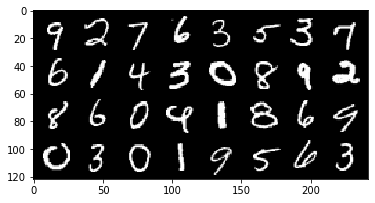

In [66]:
import numpy as np
def imshow(img):
    img = img 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(labels)

# show images
imshow(torchvision.utils.make_grid(images))

In [83]:
images[0].shape

torch.Size([1, 28, 28])

In [71]:
output = model(images)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


In [0]:
_, predicted= torch.max(output.data,1)

In [89]:
(predicted == labels).sum().item()

27